In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
tf.keras.applications.Xception
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
#from sklearn.model_selection import train_test_split

In [3]:
# set image size
IMAGE_SIZE = [224, 224]

In [4]:
train_dir = 'Dataset\train'
test_dir = 'Dataset\test'

In [5]:
# adding preprocessing layer to the front of VGG
xception = tf.keras.applications.xception.Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
# do not train current weights
for layer in xception.layers:
  layer.trainable = False

In [7]:
dir = glob('Dataset/train/*')
dir

['Dataset/train\\cardboard',
 'Dataset/train\\glass',
 'Dataset/train\\metal',
 'Dataset/train\\paper',
 'Dataset/train\\plastic',
 'Dataset/train\\trash']

In [8]:
xception.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

 block4_sepconv1_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 28, 28, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 28, 28, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 14, 14, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 14, 14, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 14, 14, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 14, 14, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 14, 14, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 14, 14, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 14, 14, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 14, 14, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

In [9]:
# our layers - you can add more if you want
#x = Flatten()(vgg.output)
#prediction = Dense(len(folders), activation='softmax')(x)

In [10]:
# preparing model structure

x = Flatten(name='flatten')(xception.output)
#x = Dense(4096, activation='relu', name='fc1')(x)
#x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(len(dir), activation='softmax', name='predictions')(x)

In [11]:
# create a model object
model = Model(inputs=xception.input, outputs=x)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

 block4_sepconv1_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 28, 28, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 28, 28, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 28, 28, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 14, 14, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 14, 14, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 14, 14, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 14, 14, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 14, 14, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 14, 14, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 14, 14, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 14, 14, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 14, 14, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_datagen.flow_from_directory("C:\\Users\\SUCHAL\\Desktop\\Research in Computing\\Thesis\\Codes\\Xception\\Dataset\\train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory("C:\\Users\\SUCHAL\\Desktop\\Research in Computing\\Thesis\\Codes\\Xception\\Dataset\\test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1294 images belonging to 6 classes.
Found 1233 images belonging to 6 classes.


In [16]:
# fit the model
r = model.fit(training_set, validation_data=test_set, epochs=35, steps_per_epoch=len(training_set), validation_steps=len(test_set))

Epoch 1/35
41/41 [==============================] - 339s 8s/step - loss: 3.7858 - accuracy: 0.6082 - val_loss: 2.6852 - val_accuracy: 0.7275
Epoch 2/35
41/41 [==============================] - 327s 8s/step - loss: 1.3824 - accuracy: 0.8192 - val_loss: 2.2221 - val_accuracy: 0.7762
Epoch 3/35
41/41 [==============================] - 322s 8s/step - loss: 0.8216 - accuracy: 0.8609 - val_loss: 2.2774 - val_accuracy: 0.7713
Epoch 4/35
41/41 [==============================] - 324s 8s/step - loss: 0.6409 - accuracy: 0.9042 - val_loss: 2.3614 - val_accuracy: 0.7851
Epoch 5/35
41/41 [==============================] - 321s 8s/step - loss: 0.4508 - accuracy: 0.9266 - val_loss: 2.5026 - val_accuracy: 0.7721
Epoch 6/35
41/41 [==============================] - 890s 22s/step - loss: 0.6561 - accuracy: 0.9057 - val_loss: 2.8017 - val_accuracy: 0.7616
Epoch 7/35
41/41 [==============================] - 283s 7s/step - loss: 0.5493 - accuracy: 0.9227 - val_loss: 3.6371 - val_accuracy: 0.7526
Epoch 8/35
4

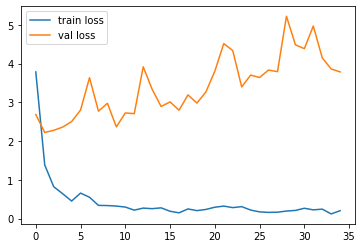

<Figure size 432x288 with 0 Axes>

In [17]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

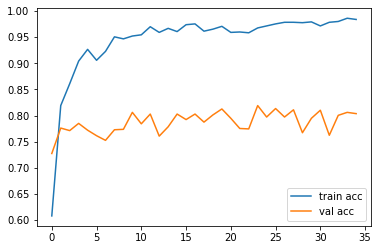

<Figure size 432x288 with 0 Axes>

In [18]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
#Save the trained model
from tensorflow.keras.models import load_model
model.save('my_Xception.h5')

In [20]:
### Prediction

In [59]:
y_pred = model.predict(test_set)

39/39 [==============================] - 159s 4s/step


In [60]:
y_pred

array([[9.6367495e-25, 4.3714195e-03, 6.2985463e-15, 1.3780436e-09,
        9.9562860e-01, 2.2498802e-15],
       [3.2394469e-35, 4.2577826e-09, 2.1200621e-04, 1.9342997e-16,
        9.9978799e-01, 2.4977270e-28],
       [0.0000000e+00, 8.1785318e-23, 1.0280752e-35, 8.7580406e-36,
        1.0000000e+00, 1.3560049e-37],
       ...,
       [6.3157974e-38, 4.7649398e-01, 5.3998596e-23, 5.3850680e-31,
        5.2350599e-01, 5.6359231e-26],
       [2.6278228e-35, 9.9979240e-01, 8.8741224e-05, 1.4050563e-10,
        1.1796812e-04, 8.6496664e-07],
       [3.6977489e-37, 8.3066361e-36, 1.9057974e-24, 1.0000000e+00,
        5.8350790e-33, 2.1954021e-23]], dtype=float32)

In [61]:
#from keras.preprocessing.image import load_img
from keras_preprocessing.image import load_img
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
from skimage.io import imread
from pylab import *


In [62]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [63]:
y_pred

array([4, 4, 4, ..., 4, 1, 3], dtype=int64)

In [64]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [65]:
#Load the model
model=load_model('my_Xception.h5')


In [66]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing import image
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

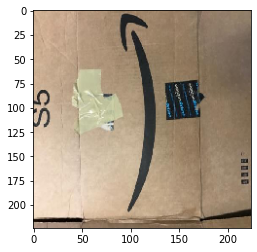

In [147]:
# Import the image for prediction
from tensorflow.keras.preprocessing import image
img=image.load_img("C:\\Users\\SUCHAL\\Desktop\\Research in Computing\\Thesis\\Codes\\Xception\\Dataset\\test\\cardboard\\cardboard297.jpg",target_size=(224,224))
imshow(img)

In [148]:
x=image.img_to_array(img)
x

array([[[192., 161., 132.],
        [205., 174., 145.],
        [207., 176., 147.],
        ...,
        [147., 129., 109.],
        [145., 127., 107.],
        [140., 122., 102.]],

       [[193., 162., 133.],
        [201., 170., 141.],
        [208., 177., 148.],
        ...,
        [145., 127., 107.],
        [140., 122., 102.],
        [135., 117.,  97.]],

       [[195., 164., 135.],
        [197., 166., 137.],
        [212., 181., 152.],
        ...,
        [143., 125., 105.],
        [142., 124., 104.],
        [143., 125., 105.]],

       ...,

       [[182., 156., 139.],
        [181., 155., 138.],
        [180., 154., 137.],
        ...,
        [124., 100.,  72.],
        [124., 100.,  72.],
        [124., 100.,  72.]],

       [[179., 151., 137.],
        [180., 152., 138.],
        [180., 152., 138.],
        ...,
        [130., 106.,  78.],
        [128., 104.,  76.],
        [125., 101.,  73.]],

       [[177., 147., 136.],
        [179., 149., 138.],
        [179., 1

In [149]:
x.shape


(224, 224, 3)

In [150]:
x=x/255

In [151]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [152]:
img_data

array([[[[-103.42136 , -116.14763 , -122.927055],
         [-103.37038 , -116.09665 , -122.876076],
         [-103.36253 , -116.088806, -122.86823 ],
         ...,
         [-103.51155 , -116.27312 , -123.10353 ],
         [-103.519394, -116.28096 , -123.111374],
         [-103.539   , -116.30057 , -123.13098 ]],

        [[-103.417435, -116.14371 , -122.923134],
         [-103.38606 , -116.112335, -122.89176 ],
         [-103.35861 , -116.084885, -122.86431 ],
         ...,
         [-103.519394, -116.28096 , -123.111374],
         [-103.539   , -116.30057 , -123.13098 ],
         [-103.55861 , -116.320175, -123.15059 ]],

        [[-103.40959 , -116.135864, -122.91529 ],
         [-103.40175 , -116.12802 , -122.90745 ],
         [-103.342926, -116.0692  , -122.848625],
         ...,
         [-103.52724 , -116.2888  , -123.11922 ],
         [-103.53116 , -116.292725, -123.12314 ],
         [-103.52724 , -116.2888  , -123.11922 ]],

        ...,

        [[-103.393906, -116.16724 , -1

In [153]:
#Predict the class
model.predict(img_data)


1/1 [==============================] - 0s 307ms/step


array([[1., 0., 0., 0., 0., 0.]], dtype=float32)

In [154]:
#1: cardboard, 2:glass, 3:metal, 4:paper, 5:plastic, 6:trash.

In [155]:
a=np.argmax(model.predict(img_data), axis=1)


1/1 [==============================] - 0s 321ms/step


In [156]:
a==1

array([False])